# ${\mathfrak{QMatch}}$

In this tutorial, we introduce the package $\mathfrak{QMatch}$ by 
- explaining functions 
- giving examples and some cross-checks

$\mathfrak{QMatch}$ is devoted to simulating fermionic $Gaussian$ $states$ and $Gaussian$ $operations$ for $1+1$ dimensional models with Hamiltonians that can be expressed in the form of free fermions. 

This package focuses on frequently used quantities and operations for quantum states and computes/simulates them by applying the free fermion formalism. Thus, the central object of study here is the correlation matrix, given which the fermionic Gaussian state can be completely determined. Functions in this package mainly work with the correlation matrices. 

See the following references for a thorough review of fermionic Gaussian states and Gaussian linear maps. 
- S. Bravyi, Lagrangian representation for fermionic linear optics, https://arxiv.org/abs/quant-ph/0404180
- B. G. Swingle and Y. Wang, Recovery map for fermionic Gaussian channels, J. Math. Phys. 60, 072202 (2019), https://arxiv.org/abs/1811.04956
- Appendix A of Y. Hu and Y. Zou, Petz map recovery for long-range entangled quantum many-body states 

# Import QMatch

In [1]:
import sys
import os
sys.path.append(os.path.abspath("./"))
from QMatch import QMatch as QM
from test_QMatch.Ising_exact import *

## import other packages needed for demonstrations

In [2]:
import numpy as np
from numpy import linalg as LA
import matplotlib
import matplotlib.pyplot as plt

# Fermionic Gaussian States
A fermionic Gaussian state (composed of $L$ spins) admits a Gaussian Grassmann representation, namely
$$
\omega(\rho,\theta) ~=~ \frac{1}{2^L}\,\exp\left( \frac{i}{2}\,\theta^{\rm T}\,G^{\rho}\,\theta \right)
$$
where 
- $G^{\rho}$ is called the correlation matrix for $\rho$
- $G^{\rho}$ is an antisymmetric real $2L\times 2L$ matrix
- The fermionic Gaussian state can be completely determined by $G^{\rho}$

Therefore, we will start with computing the correlation matrices. 

## Correlation matrix

Given a free fermion Hamiltonian taking the following form,
\begin{equation}
H ~=~ \frac{i}{2}\,\sum_{i,j=1}^{2L}\,M_{ij}\,\gamma_i\,\gamma_j
\end{equation}
Function 
**GroundStateCorrMtx(M: np.ndarray) -> np.ndarray**
computes the correlation matrix for the ground state of $H$

Input: 
- the matrix $M$: a $2L\times 2L$ dimensional real and antisymmetric matrix. 

Output: 
- the correlation matrix for the ground state of $H$: np.ndarray

### Example
Here we compute the correlation matrix of critical Ising ground state with the system size $L$, thus the output is a $2L\times 2L$ antisymmetric matrix. 
The Hamiltonian reads
$$
H_{\rm Ising} ~=~ \frac{i}{2} \sum_{k=1}^{2L} \Big[ \gamma_k \gamma_{k+1} - \gamma_{k+1} \gamma_k \Big] 
$$
with periodic boundary condition $\gamma_{2L+1} = - \gamma_1$. 

The matrix $M$ can be read off from the above equation and the function $\color{purple}{\rm Ising\_Hamiltonian\_M}(L)$ has been built to compute $M$. 

In [3]:
QM.Ising_Hamiltonian_M(L = 3)

array([[ 0.,  1.,  0.,  0.,  0.,  1.],
       [-1.,  0.,  1.,  0.,  0.,  0.],
       [ 0., -1.,  0.,  1.,  0.,  0.],
       [ 0.,  0., -1.,  0.,  1.,  0.],
       [ 0.,  0.,  0., -1.,  0.,  1.],
       [-1.,  0.,  0.,  0., -1.,  0.]])

Thus, the correlation matrix in this case can be obtained as follows.

In [4]:
QM.GroundStateCorrMtx(QM.Ising_Hamiltonian_M(L = 3))

array([[ 0.        , -0.66666667,  0.        , -0.33333333,  0.        ,
        -0.66666667],
       [ 0.66666667,  0.        , -0.66666667,  0.        , -0.33333333,
         0.        ],
       [ 0.        ,  0.66666667,  0.        , -0.66666667,  0.        ,
        -0.33333333],
       [ 0.33333333,  0.        ,  0.66666667,  0.        , -0.66666667,
         0.        ],
       [ 0.        ,  0.33333333,  0.        ,  0.66666667,  0.        ,
        -0.66666667],
       [ 0.66666667,  0.        ,  0.33333333,  0.        ,  0.66666667,
         0.        ]])

Moreover, for the maximally entangled state, the reduced density matrix is an identity matrix up to a normalization. The correlation matrices for these states 
$$\rho ~\propto~ \mathbb{I}_L$$
Their correlation matrices read $\color{purple}{\rm IdCorrMtx}(L)$. For example, 

In [5]:
QM.IdCorrMtx(L=2)

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

From the definition of the correlation matrix we can see that if $\rho \propto \mathbb{I}_L$, $G^{\rho}$ is the zero matrix with size $2L$. 

### Cross-check
To check correlation matrix of critical Ising ground state, we compare the result obtained above with the analytic result, which is 
$$
G^{\rm Ising}_{jl} ~=~ 
    \begin{cases}
        0 \qquad\qquad\qquad\qquad~ j-l~\text{is even} \\
        1/\left[L\, \sin\frac{\pi}{2L}(j-l) \right] ~~ j-l~\text{is odd} \\
    \end{cases}
$$
Again, the function $\color{purple}{\rm IsingGS\_CorrMtx}(L)$ has been built to compute $G^{\rm Ising}$. 

In [6]:
np.allclose(QM.GroundStateCorrMtx(QM.Ising_Hamiltonian_M(L=3)), QM.IsingGS_CorrMtx(L=3))

True

## Ground state energy
Function **ground_state_energy(M: np.ndarray) -> float** computes the ground state energy. 

Input: 
- the matrix $M$ in the Hamiltonian $$H ~=~ \frac{i}{2}\,\sum_{i,j=1}^{2L}\,M_{ij}\,\gamma_i\,\gamma_j$$
- it is a $2L\times 2L$ dimensional real and antisymmetric matrix

Output: 
- the ground state energy $E_{\rm GS}$

### Example
the ground state energy for critical Ising with system size $L$ can be computed as follows

In [7]:
QM.ground_state_energy(QM.Ising_Hamiltonian_M(L = 3))

np.float64(-4.0)

### Cross-check
To check the ground state energy result obtained above, we compare it with the result computed by diagonalization. 

Recall that the Hamiltonian for the Ising model reads
$$
H_{\rm Ising} ~=~ -\,\sum_{i=1}^L\left( X_i\,X_{i+1} + g\,Z_i \right)
$$
where $X$ and $Z$ are Pauli matrices and the criticality occurs at $g=1$. This $2^L\times 2^L$ matrix $H_{\rm Ising}$ can be computed by the function $\color{purple}{\rm Ising\_H\_def}(L,g)$. 

The ground state energy is the smallest eigenvalue of $H$. Namely, 

In [8]:
eigv = LA.eigvalsh(Ising_H_def(L=3, g=1))
eigv[0]

np.float64(-3.9999999999999996)

## Partial trace over the subregion 
Function
**reduced_CorrMtx(Grho: np.ndarray, siteL: int, siteR: int) -> np.ndarray**
computes the correlation matrix $G^{\rho_A}$ for a reduced density matrix $\rho_A$
$$
\rho_A ~=~ {\rm Tr}_A\,\rho
$$

Inputs: 
- Grho: the correlation matrix $G^{\rho}$ for $\rho$, which is a $2L\times2L$ real, antisymmetric matrix, namely the system is composed by $L$ spins
- siteL: the number of spins sitting on the left of $A$, siteL $\in [0,L]$
- siteR: the region $A$ ends at the siteR-th spin, siteR $\in [0,L]$ (siteR $\ge$ siteL)

Output: 
- the correlation matrix for $\rho_A$

### Example
Consider the critical Ising ground state with $L = 3$ and subregion $A$ is the first spin. 
Thus the reduced correlation matrix should be the first $2x2$ block of $G^{\rho}$, i.e. 
$$ G^{\rho_A} ~=~ 
\begin{pmatrix}
0 & -2/3\\
2/3 & 0 
\end{pmatrix} ~.
$$
We can see $G^{\rho_A}$ is reproduced as follows

In [9]:
G_rho = QM.IsingGS_CorrMtx(L=3)
QM.reduced_CorrMtx(G_rho, 0, 1)

array([[ 0.        , -0.66666667],
       [ 0.66666667,  0.        ]])

## Tensor product
Function
**tensor_prod(G1: np.ndarray, G2: np.ndarray) -> : np.ndarray**
computes the correlation matrix for a tensor product state. 

Inputs:
- G1: the correlation matrix $G^{\rho_1}$ for $\rho_1$
- G2: the correlation matrix $G^{\rho_2}$ for $\rho_2$

Output: 
- the correlation matrix $G^{\rho_1\otimes\rho_2}$ for $\rho_1\otimes\rho_2$

### Example
consider 
- $\rho_1$ is the reduced density matrix $\rho_A$ for critical Ising ground state with $L=3$ and subregion $A$ is the first spin. Namely, 
$$ G^{\rho_1} ~=~ 
\begin{pmatrix}
0 & -2/3\\
2/3 & 0 
\end{pmatrix}
$$
- $\rho_2 = \frac{1}{2}\mathbb{I}_2$. Thus $G^{\rho_2}$ is a zero matrix, 
$$
G^{\rho_2} ~=~ 
\begin{pmatrix}
0 & 0\\
0 & 0 
\end{pmatrix}
$$

The result should be 
$$
G^{\rho_1\otimes \rho_2} ~=~ 
\begin{pmatrix}
0 & -2/3 & 0 & 0\\
2/3 & 0  & 0 & 0 \\
0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 \\
\end{pmatrix}
$$
which is reproduced as follows

In [10]:
G_rho = QM.IsingGS_CorrMtx(L=3)
G1 = QM.reduced_CorrMtx(G_rho, 0, 1)
G2 = np.zeros([2,2])
QM.tensor_prod(G1, G2)

array([[ 0.        , -0.66666667,  0.        ,  0.        ],
       [ 0.66666667,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ]])

## von Neumann Entropy
Function 
**vn_entropy(Grho: np.ndarray) -> float** 
computes the von Neumann Entropy. 

Input: 
- Grho: the correlation matrix $G^{\rho}$ for $\rho$, which is a real, antisymmetric matrix

Output: 
- the von Neumann Entropy for the state $\rho$, i.e.
$$S(\rho)=-{\rm Tr}(\rho\log_2\rho)$$
Note that the logarithm is base 2. 

### Example
Consider $\rho$ to be the crtical Ising ground state with $L=10$ spins, and its reduced density matrix $\rho_A$ where $L_A = 5$. Now we compute their von Neumann entropy. First, their correlation matrices are 

In [11]:
G_rho = QM.IsingGS_CorrMtx(L=10)
G_rho_A = QM.reduced_CorrMtx(G_rho, 0, 5)

Since now $\rho$ is a pure state, it has vanishing entropy.

In [12]:
QM.vn_entropy(G_rho)

0

For $\rho_A$, it has nonzero entropy. 

In [13]:
QM.vn_entropy(G_rho_A)

np.float64(0.9695123579328221)

### Cross-check 
To check $S(\rho_A)$, we compare with the result obtained by the exact diagonalization as follows, where the function $\color{purple}{\rm Ising\_SvN\_exact\_diag}(L\_A, L)$ computes $S(\rho_A)$ by using the ground state we have obtained by diagonalizing the Hamiltonian and then plugging in the definition of the entropy. 

In [14]:
Ising_SvN_exact_diag(L_A = 5, L = 10)

np.float64(0.9695123528042153)

## Conditional mutual information
Given the correlation function $G^{\rho_{ABC}}$ and the subsystem configuration, the function
**CMI(Grho: np.ndarray, La: int, Lb: int, Lc: int) -> float**
computes the conditional mutual information (CMI) $I(A:C|B)$
$$
I(A:C|B) ~=~ S(\rho_{AB}) ~+~ S(\rho_{BC}) ~-~ S(\rho_B) ~-~ S(\rho_{ABC})
$$
where contiguous subregions $A$, $B$, $C$ have lengths $L_A$, $L_B$, and $L_C$ respectively. $A$ starts from the first spin. 

Inputs:
- Grho: the correlation function $G^{\rho_{ABC}}$ 
- La: size of the subregion $A$, $L_A$
- Lb: size of the subregion $B$, $L_B$
- Lc: size of the subregion $C$, $L_C$

Output:
- the CMI $I(A:C|B)$

### Example
Consider $\rho$ to be the crtical Ising ground state with $L=10$ spins and $(L_A,L_B,L_C) = (2,6,2)$. Then its CMI reads

In [15]:
G_rho = QM.IsingGS_CorrMtx(L=10)
QM.CMI(G_rho, 2, 6, 2)

np.float64(0.7246255063844244)

If $(L_A,L_B,L_C) = (1,6,1)$, we need to first compute $G^{\rho_{ABC}}$. Namely,

In [16]:
G_rhoABC = QM.reduced_CorrMtx(G_rho, 0, 1+6+1)
QM.CMI(G_rhoABC, 1, 6, 1)

np.float64(0.03833429119739851)

## Fidelity
Function
**Fidelity(Grho: np.ndarray, Gsigma: np.ndarray) -> float**
computes the fidelity $F(\rho,\sigma)$ between two quantum states $\rho$ and $\sigma$. 

Inputs:
- Grho: the correlation matrix of $\rho$
- Gsigma: the correlation matrix of $\sigma$

Output:
- the fidelity $F(\rho,\sigma)$

### Example
Consider $\rho$ to be the crtical Ising ground state with $L=8$ spins, the fidelity $F(\rho_{AB}, \rho_{C})$ with $(L_A,L_B,L_C) = (2,2,4)$ reads

In [17]:
G_rho = QM.IsingGS_CorrMtx(L=8)
QM.Fidelity(QM.reduced_CorrMtx(G_rho, 0, 4), QM.reduced_CorrMtx(G_rho, 4, 8))

np.float64(0.9999999999912761)

# Fermionic Gaussian Channel
A fermionic Gaussian channel $\mathcal{E}: \mathcal{C}_{2L}\to \mathcal{C}_{2L}$ admits the following Grassmann representation 
$$
\omega\left( {\cal E}(X), \theta\right) ~=~ \int D\mu D\eta\, \exp\Big[ \frac{i}{2}\,\theta^{\rm T}A\,\theta ~+~ i\,\theta^{\rm T}B\,\eta \,+\, i\eta^{\rm T}\mu \Big]\,\omega(X,\mu)
$$
where 
- $X$ is the input fermionic state composed of $2L$ Majorana fermions or equivalently $L$ spins. 
- $A$ and $B$ are $2L\times 2L$ matrices. The fermionic Gaussian channel can be completely determined by $A$ and $B$. 

Function
**Gaussian_channel(A: np.ndarray, B: np.ndarray, Grho: np.ndarray) -> : np.ndarray**
computes the new correlation matrix $G^{\mathcal{E}(\rho)}$ after a Gaussian linear map $\mathcal{E}$ acting on $\rho$. 

Inputs: 
- Grho: the original correlation matrix $G^{\rho}$ for $\rho$
- A, B: matrices in the integral representation of the fermionic Gaussian channel $\mathcal{E}$

Output: 
- the new correlation matrix $G^{\mathcal{E}(\rho)}$

## Erasure channel
Divide the system into two parts: $L1$ and $L2$. Consider an erasure channel on $L2$. 

Function 
**erasure_channel(Grho: np.ndarray, L1: int, L2: int) -> np.ndarray**
yields the new correlation matrix after implementing the erasure channel. 

Inputs:
- Grho: the correlation function for the original state 
- L1: the size of subregion $L1$
- L2: the size of subregion $L2$

Output:
- the new correlation matrix after implementing the erasure channel. 

### Example


For example, consider the critical Ising ground state with $L=3$, and $L1 = 2$, $L2=1$. After erasing the last spin, the new correlation matrix reads

In [18]:
G_rho = QM.IsingGS_CorrMtx(L=3)
QM.erasure_channel(G_rho, 2, 1)

array([[ 0.        , -0.66666667,  0.        , -0.33333333,  0.        ,
         0.        ],
       [ 0.66666667,  0.        , -0.66666667,  0.        ,  0.        ,
         0.        ],
       [ 0.        ,  0.66666667,  0.        , -0.66666667,  0.        ,
         0.        ],
       [ 0.33333333,  0.        ,  0.66666667,  0.        ,  0.        ,
         0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ]])

One can see that this is equivalent to tracing out the last spin and then tensor product with the identity matrix. Namely,

In [19]:
G_traced = QM.reduced_CorrMtx(G_rho, 0, 2)
QM.tensor_prod(G_traced, QM.IdCorrMtx(1))

array([[ 0.        , -0.66666667,  0.        , -0.33333333,  0.        ,
         0.        ],
       [ 0.66666667,  0.        , -0.66666667,  0.        ,  0.        ,
         0.        ],
       [ 0.        ,  0.66666667,  0.        , -0.66666667,  0.        ,
         0.        ],
       [ 0.33333333,  0.        ,  0.66666667,  0.        ,  0.        ,
         0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ]])

## Petz recovery map
Given a quantum (fermionic Gaussian) channel $\mathcal{N}$ and a reference state $\sigma$, the Petz map to reverse the channel $\mathcal{N}$ is defined as
$$
\mathcal{D}_{\sigma,0}(X) ~=~ \sigma^{\frac{1}{2}}\mathcal{N}^{*}(\mathcal{N}(\sigma)^{-\frac{1}{2}} X \mathcal{N}(\sigma)^{-\frac{1}{2}})\sigma^{\frac{1}{2}}
$$
where $\mathcal{N}^{*}$ is the dual channel and $X$ is the input state. Note that for the reference state,$\mathcal{D}_{\sigma,0}(\mathcal{N}(\sigma)) = \sigma$. For a generic state $\rho$, we consider $\tilde{\rho} = \mathcal{D}_{\sigma,0}(\mathcal{N}(\rho))$. 

Function
**Petz_map(Grho: np.ndarray, A_N: np.ndarray, B_N: np.ndarray, G_sigma: np.ndarray) -> np.ndarray**
computes the correlation matrix $G^{\tilde{\rho}}$ for $\tilde{\rho}$. Recall that a fermionic Gaussian channel $\mathcal{N}$ can be described by matrices A_N and B_N through the Grassmann integral representation. 

Inputs:
- Grho: the correlation matrix for the state $\rho$
- A_N: matrix A in the integral representation of channel $\mathcal{N}$
- B_N: matrix B in the integral representation of channel $\mathcal{N}$
- G_sigma: the correlation matrix for the reference state $\sigma$

Output:
- the new correlation matrix $G^{\tilde{\rho}}$ after implementing the Petz recovery map

### Example
Consider the state $\rho_{ABCD}$ to be the critical Ising ground state with $L=8$, $(L_A,L_B,L_C,L_D)=(1,5,1,1)$ and the channel $\mathcal{N}$ to be the erasure channel on $C$. 
Choose the reference state as $\sigma = \rho_A\otimes\rho_{BC}$. 
$A_N$ and $B_N$ for the erasure channel can be obtained via the function $\color{purple}{\rm erasure\_channel\_param(L1, L2)}$. Thus, we implement the Petz map on $\rho_{ABC}$ as follows

In [20]:
A_N, B_N = QM.erasure_channel_param(L1=6, L2=1)
Grho_ABC = QM.reduced_CorrMtx(QM.IsingGS_CorrMtx(L=8), 0, 7)
Gsigma = QM.tensor_prod(QM.reduced_CorrMtx(Grho_ABC, 0, 1), QM.reduced_CorrMtx(Grho_ABC, 1, 7))
G_tilde_rho = QM.Petz_map(Grho_ABC, A_N, B_N, Gsigma)

Moreover, we can compute the fidelity between $\rho$ and $\tilde{\rho}$ and see that the Petz recovery map does a pretty good job. 

In [21]:
QM.Fidelity(Grho_ABC, G_tilde_rho)

np.float64(0.9934173876837776)

## Rotated Petz recovery map
The rotated Petz map is defined as 
$$
\mathcal{D}_{\sigma,t}(X) = \sigma^{\frac{1+it}{2}}\mathcal{N}^{*}(\mathcal{N}(\sigma)^{\frac{-1-it}{2}} X \mathcal{N}(\sigma)^{\frac{-1+it}{2}})\sigma^{\frac{1-it}{2}}
$$
where $t=0$ corresponds to the Petz map. 
Similar to the Petz map, we have the function
**rotated_Petz_map(Grho: np.ndarray, t: float, A_N: np.ndarray, B_N: np.ndarray, G_sigma: np.ndarray) -> np.ndarray**
to compute the correlation matrix for $\tilde{\rho}_t=\mathcal{D}_{\sigma,t}(\mathcal{N}(\rho))$. 

Inputs:
- Grho: the correlation matrix for the state $\rho$
- t: the parameter $t$ for the rotated Petz map
- A_N: matrix A in the integral representation of channel $\mathcal{N}$
- B_N: matrix B in the integral representation of channel $\mathcal{N}$
- G_sigma: the correlation matrix for the reference state $\sigma$

Output:
- the new correlation matrix $G^{\tilde{\rho}_t}$ after implementing the rotated Petz recovery map


### Example
Consider the same setup as we did for the Petz map and $t\in[-5,5]$. Thus we can plot the fidelity $F_t(\rho,\tilde{\rho})$ as a function of $t$.

In [22]:
A_N, B_N = QM.erasure_channel_param(L1=6, L2=1)
Grho_ABC = QM.reduced_CorrMtx(QM.IsingGS_CorrMtx(L=8), 0, 7)
Gsigma = QM.tensor_prod(QM.reduced_CorrMtx(Grho_ABC, 0, 1), QM.reduced_CorrMtx(Grho_ABC, 1, 7))

In [23]:
t_lst = [x/100 for x in range(-500, 501, 1)]
F_t = []
for t in t_lst:
    G_tilde_rho = QM.rotated_Petz_map(Grho_ABC, t, A_N, B_N, Gsigma)
    F_t.append(QM.Fidelity(Grho_ABC, G_tilde_rho)) 

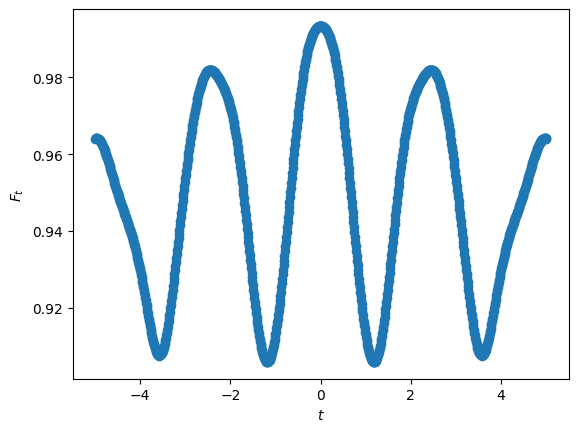

In [24]:
plt.scatter(t_lst, F_t)
plt.ylabel('$F_t$')
plt.xlabel('$t$')
plt.show()

Also, as a consistency check, when $t=0$, function rotated_Petz_map and Petz_map should yield the same result.

In [25]:
np.allclose(QM.rotated_Petz_map(Grho_ABC, 0, A_N, B_N, Gsigma), QM.Petz_map(Grho_ABC, A_N, B_N, Gsigma))

True

# Gaussian Measurements
Function
**measure_Z(Grho: np.ndarray, spin: int) -> np.ndarray**
gives the new correlation matrix after a Z measurement at site = spin

Inputs:
- Grho: the correlation matrix for the state before the measurement
- spin: specify which spin is getting the measurement

Output:
- the new correlation matrix after the Z measurement

Note that there is an intrinsic randomness for the measurement. The outcome follows the Born rule. 

## Example
Let's look at the critical Ising ground state with $L=2$ and measure the first spin along $Z$. After the measurement, the correlation matrix becomes

In [26]:
QM.measure_Z(QM.IsingGS_CorrMtx(L=2),1)

array([[ 0., -1.,  0.,  0.],
       [ 1.,  0.,  0.,  0.],
       [ 0.,  0.,  0., -1.],
       [ 0.,  0.,  1.,  0.]])

The above result is exactly what we would expect. 

Since in this case, we only have two spins, after the measurement, two spins decouple thus the off-diagonal $2\times2$ matrices should be zero. The first diagonal block matrix corresponds to spin 1, which is either $\begin{pmatrix}
0 & -1\\
1 & 0
\end{pmatrix}$ $\leftrightarrow$ $Z_1=+1$ or $\begin{pmatrix}
0 & 1\\
-1 & 0
\end{pmatrix}$ $\leftrightarrow$ $Z_1=-1$. 

From the exact diagonalization (shown below), we can see that the ground state takes the following form 
$|\psi\rangle = a\,|00\rangle + b\,|11\rangle$

In [27]:
eigv, eigvec = LA.eigh(Ising_H_def(L=2, g=1))
eigvec[:,0]

array([-0.92387953,  0.        ,  0.        , -0.38268343])

Thus, after the $Z_1$ measurement, the second spin collapses to the same state as the spin 1. Namely, the second diagonal block matrix should also be equal to the first block. 

If we run the same script several times, it could give us two different outputs corresponding to two different measurement outcomes. 
$$
\begin{pmatrix}
0 & -1 & 0 & 0\\
1 & 0 & 0 & 0\\
0 & 0 & 0 & -1\\
0 & 0 & 1 & 0\\
\end{pmatrix}~\leftrightarrow~|00\rangle ~~,~~
\begin{pmatrix}
0 & 1 & 0 & 0\\
-1 & 0 & 0 & 0\\
0 & 0 & 0 & 1\\
0 & 0 & -1 & 0\\
\end{pmatrix}~\leftrightarrow~|11\rangle
$$

In [28]:
QM.measure_Z(QM.IsingGS_CorrMtx(L=2),1)

array([[ 0., -1.,  0.,  0.],
       [ 1.,  0.,  0.,  0.],
       [ 0.,  0.,  0., -1.],
       [ 0.,  0.,  1.,  0.]])